In [1]:
from src import *
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

### data preparation

In [2]:
DF = pd.read_csv('./data/task4.csv', index_col='timestamp', parse_dates=True)
DF = DF.apply(pd.to_numeric)

In [3]:
market = DF.iloc[1::2].reset_index(drop=True) - DF.iloc[::2].reset_index(drop=True)
market.index = DF.index[1::2].date
price = market['price'].cumsum()
df = DF.iloc[1::2]
df = df.drop(columns=['price'])
df.index = df.index.date
df['price'] = price
df

,0_long,1_long,2_short,3_short,4_long,5_long,6_long,7_long,8_long,9_short,...,258_long,259_long,260_long,261_long,262_short,263_short,264_short,265_short,naive_ave_pnl,price
2006-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00
2006-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,-4.00
2006-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,-1.00
2006-01-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00
2006-01-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-07-07,5058.0,3353.0,7391.0,1270.0,2350.0,3443.0,1146.0,1207.0,1799.0,8677.0,...,518.0,1970.0,3170.0,420.0,6349.0,4267.0,4169.0,8467.0,3266.097744,-495.50
2025-07-08,5058.0,3353.0,7391.0,1270.0,2350.0,3443.0,1146.0,1207.0,1817.0,8677.0,...,518.0,1988.0,3188.0,420.0,6349.0,4267.0,4169.0,8467.0,3267.518797,-491.00
2025-07-09,5058.0,3353.0,7391.0,1270.0,2350.0,3443.0,1146.0,1277.0,1887.0,8677.0,...,518.0,1988.0,3258.0,490.0,6349.0,4267.0,4169.0,8467.0,3270.413534,-473.50
2025-07-10,4993.0,3353.0,7391.0,1270.0,2350.0,3443.0,1146.0,1277.0,1822.0,8677.0,...,518.0,1988.0,3193.0,425.0,6349.0,4267.0,4169.0,8467.0,3265.281955,-489.75


In [4]:
long_columns = [c for c in df.columns if 'long' in c] + ['naive_ave_pnl', 'price']
short_columns = [c for c in df.columns if 'short' in c] + ['naive_ave_pnl', 'price']
long = df[long_columns]
short = df[short_columns]

In [6]:
long_metrics = calc_metrics(long)

/Users/vivianguo/Sauma Capital/sauma-group/src/metrics.py:64: RuntimeWarning: invalid value encountered in divide
  sharpe = np.where(rstd == 0, 0, rmean / rstd * np.sqrt(252))
/Users/vivianguo/Sauma Capital/sauma-group/src/metrics.py:44: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if dd[i] == 0:
/Users/vivianguo/Sauma Capital/sauma-group/src/metrics.py:49: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  while j >= 0 and dd[j] > 0:
/Users/vivianguo/Sauma Capital/sauma-group/src/metrics.py:64: RuntimeWarning: invalid value encountered in divide
  sharpe = np.where(rstd == 0, 0, rmean / rstd * np.sqrt(252))
/Users/vivi

In [22]:
long1M = {}
for col, frame in long_metrics.items():
    frame.fillna(0, inplace=True)
    frame.index = pd.to_datetime(frame.index)
    long1M[col] = frame.resample('1M').last()

/var/folders/x0/47gb5md96sdcz2ww8mdbxprh0000gn/T/ipykernel_1017/2326644324.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  long1M[col] = frame.resample('1M').last()
/var/folders/x0/47gb5md96sdcz2ww8mdbxprh0000gn/T/ipykernel_1017/2326644324.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  long1M[col] = frame.resample('1M').last()
/var/folders/x0/47gb5md96sdcz2ww8mdbxprh0000gn/T/ipykernel_1017/2326644324.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  long1M[col] = frame.resample('1M').last()
/var/folders/x0/47gb5md96sdcz2ww8mdbxprh0000gn/T/ipykernel_1017/2326644324.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  long1M[col] = frame.resample('1M').last()
/var/folders/x0/47gb5md96sdcz2ww8mdbxprh0000gn/T/ipykernel_1017/2326644324.py:5: FutureWarning: 'M' is d

In [8]:
short_metrics = calc_metrics(short)

/Users/vivianguo/Sauma Capital/sauma-group/src/metrics.py:64: RuntimeWarning: invalid value encountered in divide
  sharpe = np.where(rstd == 0, 0, rmean / rstd * np.sqrt(252))
/Users/vivianguo/Sauma Capital/sauma-group/src/metrics.py:44: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if dd[i] == 0:
/Users/vivianguo/Sauma Capital/sauma-group/src/metrics.py:49: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  while j >= 0 and dd[j] > 0:
/Users/vivianguo/Sauma Capital/sauma-group/src/metrics.py:64: RuntimeWarning: invalid value encountered in divide
  sharpe = np.where(rstd == 0, 0, rmean / rstd * np.sqrt(252))
/Users/vivi

In [23]:
short1M = {}
for col, frame in long_metrics.items():
    frame.fillna(0, inplace=True)
    frame.index = pd.to_datetime(frame.index)
    short1M[col] = frame.resample('1M').last()

/var/folders/x0/47gb5md96sdcz2ww8mdbxprh0000gn/T/ipykernel_1017/4194868815.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  short1M[col] = frame.resample('1M').last()
/var/folders/x0/47gb5md96sdcz2ww8mdbxprh0000gn/T/ipykernel_1017/4194868815.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  short1M[col] = frame.resample('1M').last()
/var/folders/x0/47gb5md96sdcz2ww8mdbxprh0000gn/T/ipykernel_1017/4194868815.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  short1M[col] = frame.resample('1M').last()
/var/folders/x0/47gb5md96sdcz2ww8mdbxprh0000gn/T/ipykernel_1017/4194868815.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  short1M[col] = frame.resample('1M').last()
/var/folders/x0/47gb5md96sdcz2ww8mdbxprh0000gn/T/ipykernel_1017/4194868815.py:5: FutureWarning: 'M' 

In [40]:
def compute_EI_trader(dic: dict, alpha: float, weights = None) -> pd.DataFrame:
    positive_metrics_name = ['sharpe','pnl_t','days_since_first_trade',
        'drawup_beta','excess_mean_ret','excess_ret','success_rate']
    
    # re_arrange_df
    time_dic = {}
    time_index = dic[pd.Timestamp('2006-01-31 00:00:00')].index
    for t in time_index:
        records = {}
        for trader, df in dic.items():
            records[trader] = df.loc[t]
        time_dic[t] = pd.DataFrame.from_dict(records, orient='index')

    EIs_list = []
    # transform each measure
    for time, df in time_dic.items():
        df_vals = df.to_numpy()
        metric_names = df.columns.to_list()
        pos_mask = np.array([c in positive_metrics_name for c in metric_names])

        for j in range(df_vals.shape[1]):
            col_arr = df_vals[:, j]
            if pos_mask[j]:
                df_vals[:, j] = two_steps_transformer(col_arr, alpha)
            else:
                df_vals[:, j] = 1 - two_steps_transformer(col_arr, alpha)
        df_transformed = pd.DataFrame(df_vals, index=df.index, columns=df.columns)
    
     # get EIs
     # weights as the distri
        K = len(metric_names)
        if weights is None:
            w = np.ones(K) / K
        else:
            w = np.array(weights)
        
        tmp = df_transformed.dot(w)
        EIs_list.append(tmp.rename(time))
        
    EIs = pd.concat(EIs_list, axis=1)
    EIs.fillna(0, inplace=True)
    return EIs.T


def linear_transformer(measures: np.ndarray, alpha: float):
    """Vectorized linear transformer for numpy arrays."""
    mask = ~np.isnan(measures)
    clean = measures[mask]
    if clean.size == 0:
        return measures
    
    z_alpha = np.quantile(clean, alpha)
    z_1m_alpha = np.quantile(clean, 1-alpha)
    if z_1m_alpha == z_alpha:
        return measures
    a = np.log((1-alpha)/alpha)
    beta = 2 * a / (z_1m_alpha - z_alpha)

    out = measures.copy()
    out[mask] = beta * (clean - z_alpha) - a
    return out

def sigmoid(measures: np.ndarray):
    return 1 / (1 + np.exp(-measures))

def two_steps_transformer(measures: np.ndarray, alpha: float):
    return sigmoid(linear_transformer(measures, alpha))

### Weights Playing

In [5]:
def get_weights(rt = 0.25, drawdown = 0.25, length = 0.25, volatility = 0.25):
    # rt: drawup_beta, pnl_t, excess_mean_ret, excess_ret, success_rate. --- 5
    # drawdown: mdd_p, ldd_p, cvar_5, drawdown_beta, cdd_percent, mdd_days, ldd_days, calmar --- 8
    # length: days_since_first_trade --- 1
    # volatility: sharpe --- 1

    # order: 'mdd_percent’,’ ldd_percent’, ‘sharpe’:, ‘cdd_percent’, ‘mdd_days'
    # 'ldd_days’, ‘pnl_t’, ‘days_since_first_trade’, ‘drawdown_beta’, ‘drawup_beta’
    # ‘excess_mean_ret’, ‘excess_ret’, cvar_5’, ‘success_rate’, ‘calmar'

    return np.array([drawdown/8, drawdown/8, volatility, drawdown/8, drawdown/8, drawdown/8, rt/5, 
            length, drawdown/8, rt/5, rt/5, rt/5, drawdown/8, rt/5, drawdown/8])


In [24]:
# get re-arrange dict
time_hor = long1M['0_long'].index

long1M_traders = {}
for t in time_hor:
    records = {}
    for trader, df1 in long1M.items():
        records[trader] = df1.loc[t]
    long1M_traders[t] = pd.DataFrame.from_dict(records, orient='index')

#### Long

In [119]:
def visualize(EIdf, df, title = None, random_state=42):
    cols = EIdf.columns
    
    rng = np.random.default_rng(random_state)
    selected = rng.choice(cols, size = 6, replace=False)

    x_min, x_max = df.index.min(), df.index.max()
    y_min = df[selected].min().min()
    y_max = df[selected].max().max()

    ncols = 2
    nrows = 3
    fig, axes = plt.subplots(nrows, ncols, figsize=(10, 3*nrows), squeeze=False)

    for i, col in enumerate(selected):
        ax = axes[i // ncols][i % ncols]

        series = df[col]
        final_EI = EIdf[col].iloc[-1]
        auc_EI = EIdf[col].sum()

        ax.plot(series.index, series.values)

        ax.set_title(f"{col}\nFinal EI={final_EI:.4f}, EI AUC={auc_EI:.2f}", fontsize=10)
        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_min, y_max)

    for j in range(i+1, nrows*ncols):
        fig.delaxes(axes[j // ncols][j % ncols])

    fig.suptitle(title, fontsize=14)
    fig.tight_layout(rect=[0, 0, 1, 0.97])
    plt.show()

##### For EI, EUC compare

/var/folders/x0/47gb5md96sdcz2ww8mdbxprh0000gn/T/ipykernel_1017/2097630694.py:64: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-measures))


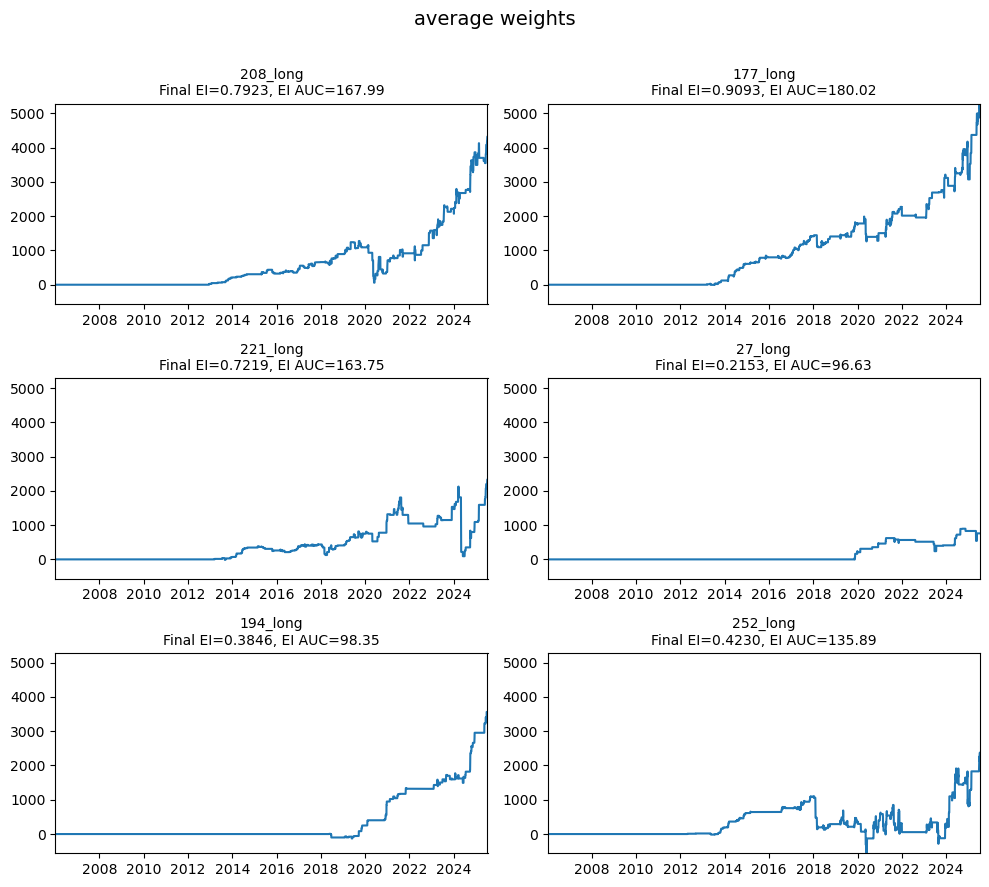

In [121]:
weights = get_weights() # average weights
EI_long_trader = compute_EI_trader(long1M_traders, alpha=0.05, weights = get_weights()).T
visualize(EI_long_trader, long, title = 'average weights', random_state=41)

/var/folders/x0/47gb5md96sdcz2ww8mdbxprh0000gn/T/ipykernel_1017/2097630694.py:64: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-measures))


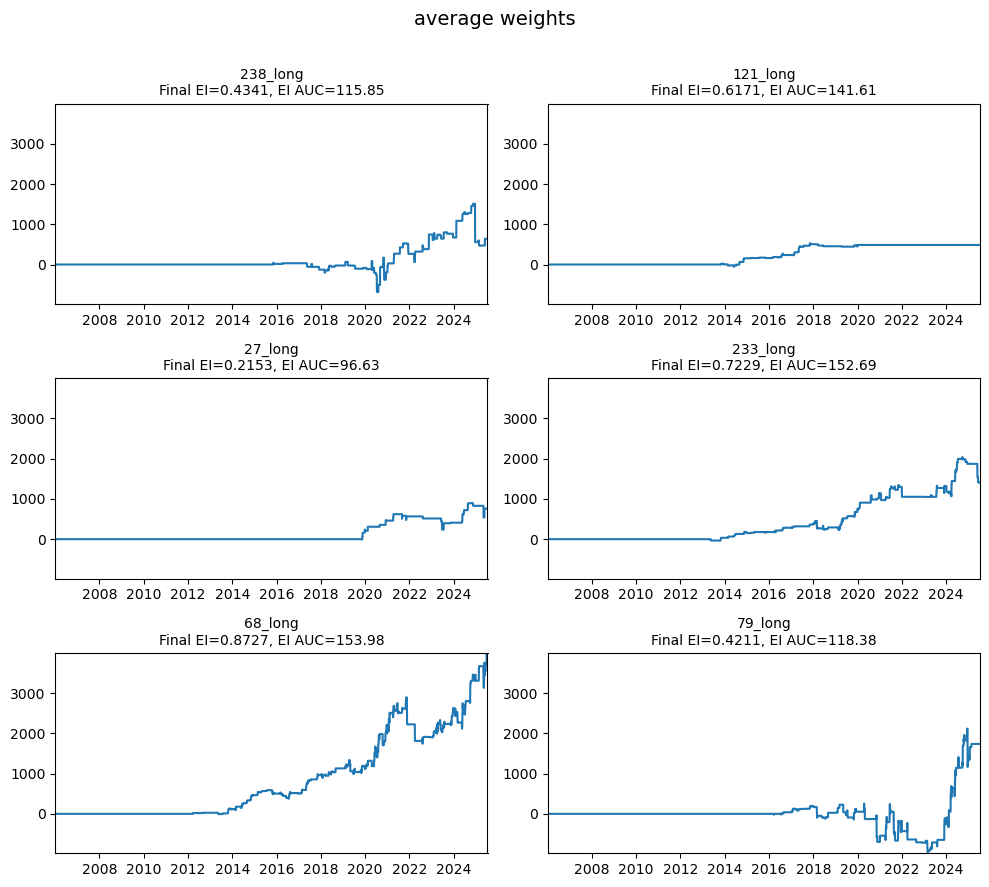

In [182]:
weights = get_weights() # average weights
EI_long_trader = compute_EI_trader(long1M_traders, alpha=0.05, weights = get_weights()).T
visualize(EI_long_trader, long, title = 'average weights', random_state=20)

/var/folders/x0/47gb5md96sdcz2ww8mdbxprh0000gn/T/ipykernel_1017/2097630694.py:64: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-measures))


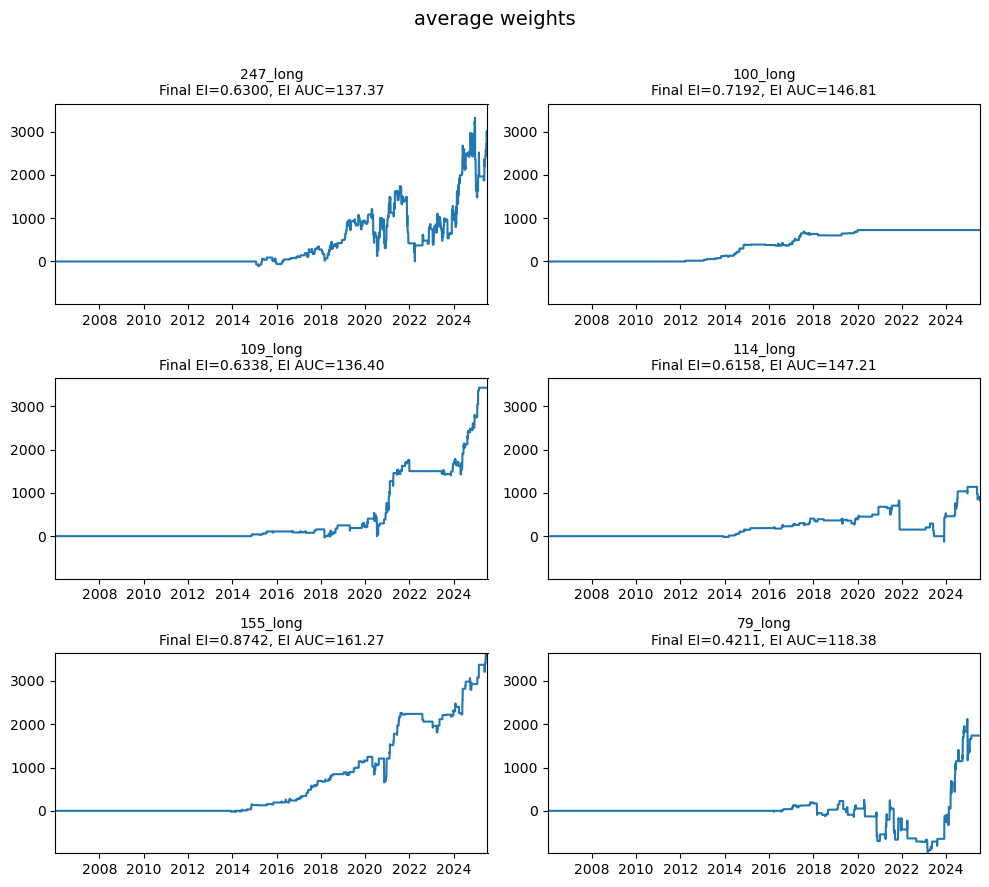

In [183]:
weights = get_weights() # average weights
EI_long_trader = compute_EI_trader(long1M_traders, alpha=0.05, weights = get_weights()).T
visualize(EI_long_trader, long, title = 'average weights', random_state=19)

#### weights adjustment

In [127]:
import warnings


===== Selected col: 261_long =====


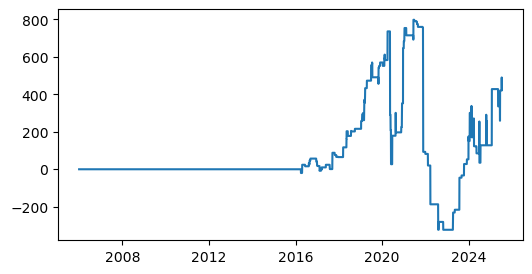


--- ave ---
Final EI = 0.379731
EI AUC   = 120.823983

--- rt ---
Final EI = 0.238008
EI AUC   = 104.605957

--- drawdown ---
Final EI = 0.376866
EI AUC   = 135.149153

--- length ---
Final EI = 0.721893
EI AUC   = 130.846803

--- volatility ---
Final EI = 0.182158
EI AUC   = 112.694021

===== Selected col: 252_long =====


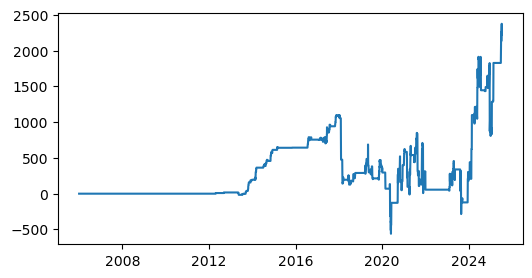


--- ave ---
Final EI = 0.423043
EI AUC   = 135.889431

--- rt ---
Final EI = 0.308532
EI AUC   = 127.182879

--- drawdown ---
Final EI = 0.473758
EI AUC   = 128.767538

--- length ---
Final EI = 0.739217
EI AUC   = 146.636170

--- volatility ---
Final EI = 0.170666
EI AUC   = 140.971137

===== Selected col: 228_long =====


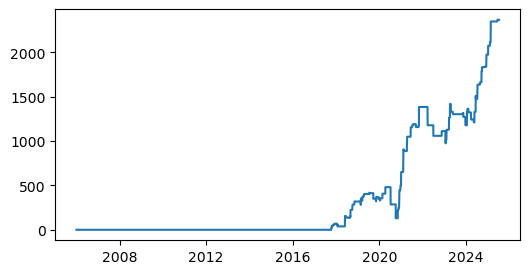


--- ave ---
Final EI = 0.353643
EI AUC   = 105.803653

--- rt ---
Final EI = 0.445243
EI AUC   = 110.451966

--- drawdown ---
Final EI = 0.600478
EI AUC   = 121.509517

--- length ---
Final EI = 0.183110
EI AUC   = 90.094739

--- volatility ---
Final EI = 0.185743
EI AUC   = 101.158390

===== Selected col: 209_long =====


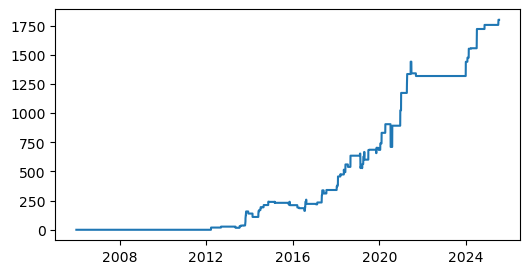


--- ave ---
Final EI = 0.738117
EI AUC   = 147.733066

--- rt ---
Final EI = 0.488456
EI AUC   = 136.451858

--- drawdown ---
Final EI = 0.744375
EI AUC   = 148.666703

--- length ---
Final EI = 0.865247
EI AUC   = 153.083226

--- volatility ---
Final EI = 0.854392
EI AUC   = 152.730475

===== Selected col: 48_long =====


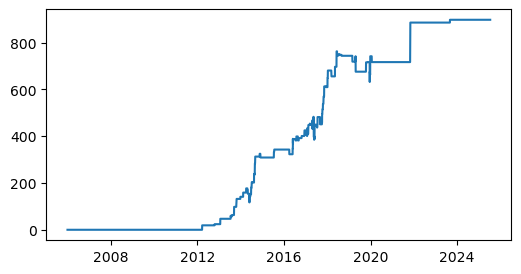


--- ave ---
Final EI = 0.701984
EI AUC   = 146.560286

--- rt ---
Final EI = 0.473930
EI AUC   = 139.944098

--- drawdown ---
Final EI = 0.632545
EI AUC   = 141.095656

--- length ---
Final EI = 0.850794
EI AUC   = 152.614114

--- volatility ---
Final EI = 0.850668
EI AUC   = 152.587274

===== Selected col: 126_long =====


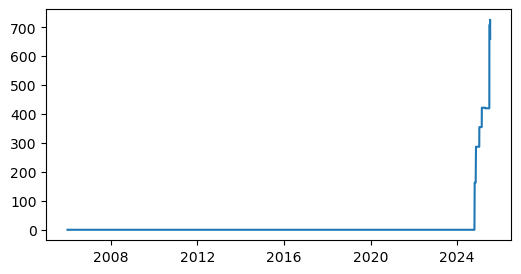


--- ave ---
Final EI = 0.268479
EI AUC   = 92.676350

--- rt ---
Final EI = 0.306663
EI AUC   = 91.909153

--- drawdown ---
Final EI = 0.492433
EI AUC   = 110.553416

--- length ---
Final EI = 0.137389
EI AUC   = 84.117815

--- volatility ---
Final EI = 0.137433
EI AUC   = 84.125015

===== Selected col: 8_long =====


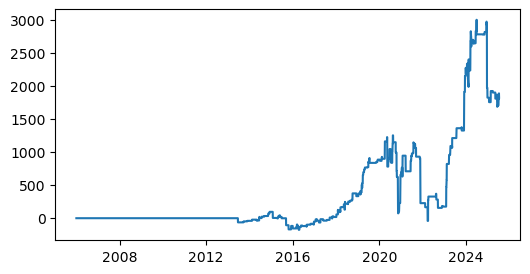


--- ave ---
Final EI = 0.476445
EI AUC   = 128.497461

--- rt ---
Final EI = 0.410125
EI AUC   = 123.161139

--- drawdown ---
Final EI = 0.510830
EI AUC   = 127.330220

--- length ---
Final EI = 0.760578
EI AUC   = 159.545949

--- volatility ---
Final EI = 0.224248
EI AUC   = 103.952537

===== Selected col: 258_long =====


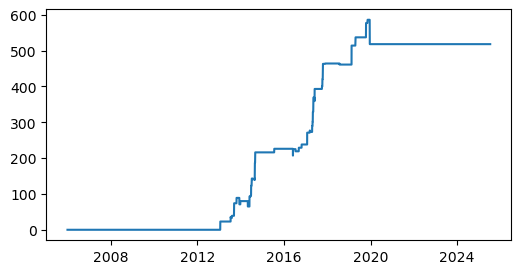


--- ave ---
Final EI = 0.618711
EI AUC   = 159.208720

--- rt ---
Final EI = 0.333007
EI AUC   = 134.288885

--- drawdown ---
Final EI = 0.506843
EI AUC   = 146.403286

--- length ---
Final EI = 0.817484
EI AUC   = 177.031603

--- volatility ---
Final EI = 0.817509
EI AUC   = 179.111107

===== Selected col: 212_long =====


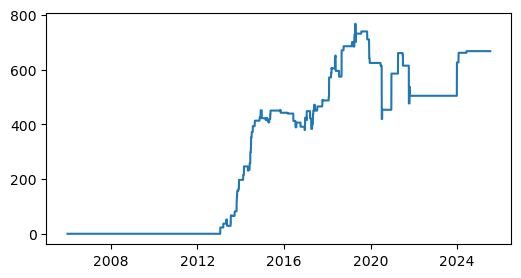


--- ave ---
Final EI = 0.639960
EI AUC   = 161.488199

--- rt ---
Final EI = 0.341644
EI AUC   = 144.725447

--- drawdown ---
Final EI = 0.566219
EI AUC   = 143.254062

--- length ---
Final EI = 0.825984
EI AUC   = 177.943394

--- volatility ---
Final EI = 0.825992
EI AUC   = 180.029893

===== Selected col: 151_long =====


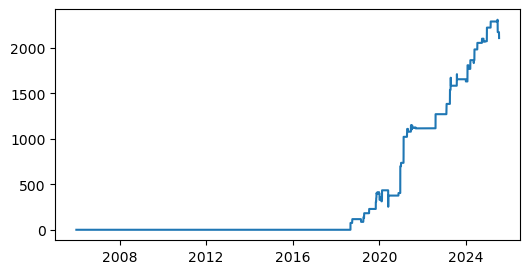


--- ave ---
Final EI = 0.263138
EI AUC   = 99.157426

--- rt ---
Final EI = 0.281558
EI AUC   = 107.021212

--- drawdown ---
Final EI = 0.490670
EI AUC   = 114.224841

--- length ---
Final EI = 0.137852
EI AUC   = 86.843331

--- volatility ---
Final EI = 0.142474
EI AUC   = 88.540320


In [134]:
for i in range(10):
    rng = np.random.default_rng()
    all_cols = list(long.columns.difference(['naive_ave_daily', 'price']))
    col = rng.choice(all_cols)
    print(f"\n===== Selected col: {col} =====")

    plt.figure(figsize = (6, 3))
    plt.plot(long.index, long[col])
    plt.show()

    weight_list = [get_weights(),
                get_weights(rt = 0.7, drawdown = 0.1, length = 0.1, volatility = 0.1),
                get_weights(rt = 0.1, drawdown = 0.7, length = 0.1, volatility = 0.1),
                get_weights(rt = 0.1, drawdown = 0.1, length = 0.7, volatility = 0.1),
                get_weights(rt = 0.1, drawdown = 0.1, length = 0.1, volatility = 0.7),
                ]
    names = ['ave', 'rt', 'drawdown', 'length', 'volatility']

    for i, w in enumerate(weight_list, start=1):
        with warnings.catch_warnings():
            warnings.simplefilter("ignore")
            EI_df = compute_EI_trader(long1M_traders, alpha=0.05, weights=w).T

        final_EI = EI_df[col].iloc[-1]
        auc_EI   = EI_df[col].sum()

        print(f"\n--- {names[i-1]} ---")
        print(f"Final EI = {final_EI:.6f}")
        print(f"EI AUC   = {auc_EI:.6f}")

### Sensitivity analysis

40_long


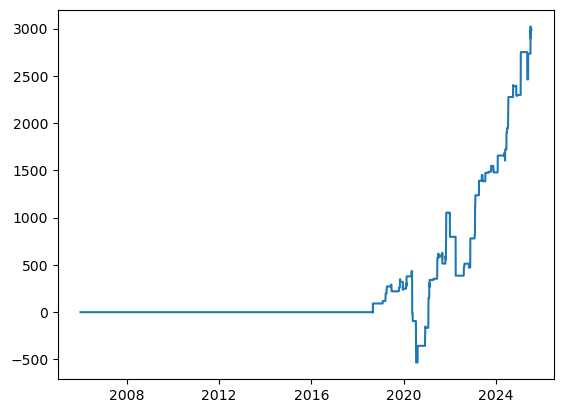

In [145]:
# randomly select 1 trader from long
rng = np.random.default_rng()
col = rng.choice(long.columns.difference(['naive_ave_daily', 'price']))
print(col)
plt.plot(long.index, long[col])

In [161]:
def sensitivity_analysis(df, n, N):
    rng = np.random.default_rng(42)
    finalEIs = []
    AUCs = []
    for _ in range(N):
        drop_cols = []
        for i in range(n):
            drop_cols.append(rng.choice(df.index))
        DF = df.drop(drop_cols)
        mets = calc_metrics(DF)
        weights = get_weights()
        EI = compute_EI_time(mets, alpha=0.05, weights=weights)
        final_EI = EI.iloc[-1]
        AUC = EI.sum()
        finalEIs.append(final_EI)
        AUCs.append(AUC)
    
    return finalEIs, AUCs

In [163]:
temp = long[[col, 'price']]
finalEIs, AUCs = sensitivity_analysis(temp, 1, 100)

/Users/vivianguo/Sauma Capital/sauma-group/src/metrics.py:64: RuntimeWarning: invalid value encountered in divide
  sharpe = np.where(rstd == 0, 0, rmean / rstd * np.sqrt(252))
/Users/vivianguo/Sauma Capital/sauma-group/src/metrics.py:44: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if dd[i] == 0:
/Users/vivianguo/Sauma Capital/sauma-group/src/metrics.py:49: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  while j >= 0 and dd[j] > 0:
/Users/vivianguo/Sauma Capital/sauma-group/src/metrics.py:64: RuntimeWarning: invalid value encountered in divide
  sharpe = np.where(rstd == 0, 0, rmean / rstd * np.sqrt(252))
/Users/vivi

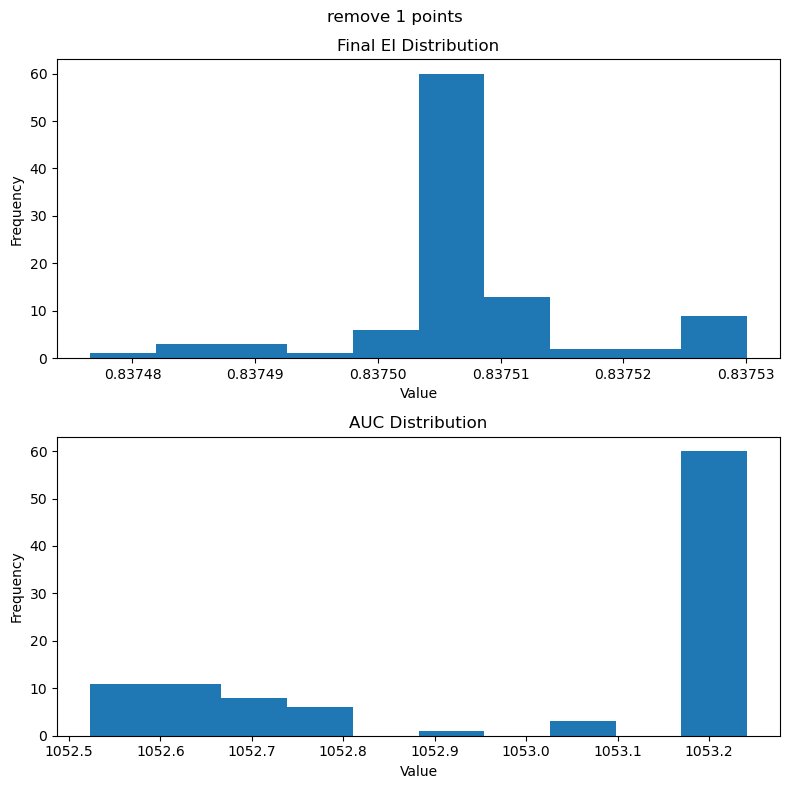

In [174]:
fig, axes = plt.subplots(2, 1, figsize=(8, 8))

# ----- subplot 1: final EI -----
clean_EIs = [float(v.iloc[0]) if isinstance(v, pd.Series) else float(v) for v in finalEIs]
axes[0].hist(clean_EIs, bins=10)
axes[0].set_xlabel("Value")
axes[0].set_ylabel("Frequency")
axes[0].set_title("Final EI Distribution")

# ----- subplot 2: AUC -----
clean_AUCs = [float(v.iloc[0]) if isinstance(v, pd.Series) else float(v) for v in AUCs]
axes[1].hist(clean_AUCs, bins = 10)
axes[1].set_xlabel("Value")
axes[1].set_ylabel("Frequency")
axes[1].set_title("AUC Distribution")

plt.suptitle(f'remove 1 points')
plt.tight_layout()
plt.show()

In [175]:
finalEIs, AUCs = sensitivity_analysis(temp, 5, 100)


/Users/vivianguo/Sauma Capital/sauma-group/src/metrics.py:64: RuntimeWarning: invalid value encountered in divide
  sharpe = np.where(rstd == 0, 0, rmean / rstd * np.sqrt(252))
/Users/vivianguo/Sauma Capital/sauma-group/src/metrics.py:44: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if dd[i] == 0:
/Users/vivianguo/Sauma Capital/sauma-group/src/metrics.py:49: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  while j >= 0 and dd[j] > 0:
/Users/vivianguo/Sauma Capital/sauma-group/src/metrics.py:64: RuntimeWarning: invalid value encountered in divide
  sharpe = np.where(rstd == 0, 0, rmean / rstd * np.sqrt(252))
/Users/vivi

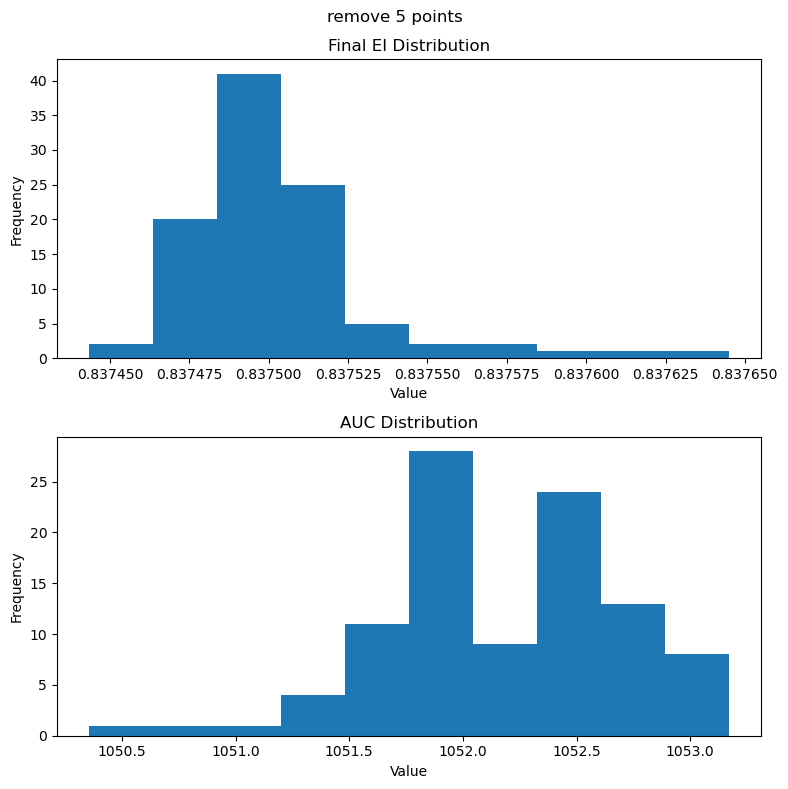

In [177]:
fig, axes = plt.subplots(2, 1, figsize=(8, 8))

# ----- subplot 1: final EI -----
clean_EIs = [float(v.iloc[0]) if isinstance(v, pd.Series) else float(v) for v in finalEIs]
axes[0].hist(clean_EIs, bins=10)
axes[0].set_xlabel("Value")
axes[0].set_ylabel("Frequency")
axes[0].set_title("Final EI Distribution")

# ----- subplot 2: AUC -----
clean_AUCs = [float(v.iloc[0]) if isinstance(v, pd.Series) else float(v) for v in AUCs]
axes[1].hist(clean_AUCs, bins = 10)
axes[1].set_xlabel("Value")
axes[1].set_ylabel("Frequency")
axes[1].set_title("AUC Distribution")

plt.suptitle(f'remove 5 points')
plt.tight_layout()
plt.show()

In [178]:
finalEIs, AUCs = sensitivity_analysis(temp, 20, 100)


/Users/vivianguo/Sauma Capital/sauma-group/src/metrics.py:64: RuntimeWarning: invalid value encountered in divide
  sharpe = np.where(rstd == 0, 0, rmean / rstd * np.sqrt(252))
/Users/vivianguo/Sauma Capital/sauma-group/src/metrics.py:44: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if dd[i] == 0:
/Users/vivianguo/Sauma Capital/sauma-group/src/metrics.py:49: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  while j >= 0 and dd[j] > 0:
/Users/vivianguo/Sauma Capital/sauma-group/src/metrics.py:64: RuntimeWarning: invalid value encountered in divide
  sharpe = np.where(rstd == 0, 0, rmean / rstd * np.sqrt(252))
/Users/vivi

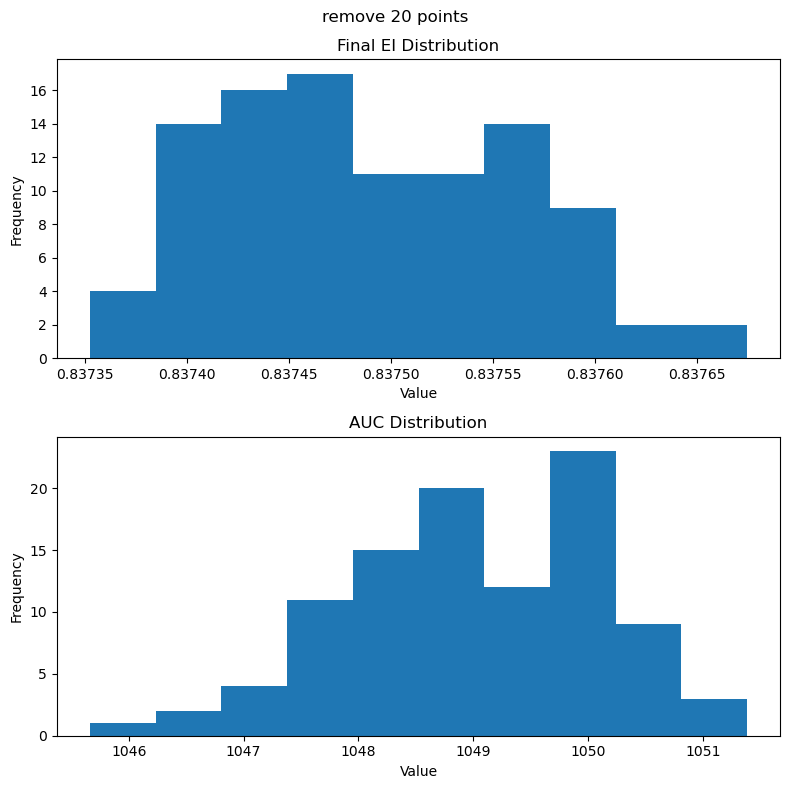

In [179]:
fig, axes = plt.subplots(2, 1, figsize=(8, 8))

# ----- subplot 1: final EI -----
clean_EIs = [float(v.iloc[0]) if isinstance(v, pd.Series) else float(v) for v in finalEIs]
axes[0].hist(clean_EIs, bins=10)
axes[0].set_xlabel("Value")
axes[0].set_ylabel("Frequency")
axes[0].set_title("Final EI Distribution")

# ----- subplot 2: AUC -----
clean_AUCs = [float(v.iloc[0]) if isinstance(v, pd.Series) else float(v) for v in AUCs]
axes[1].hist(clean_AUCs, bins = 10)
axes[1].set_xlabel("Value")
axes[1].set_ylabel("Frequency")
axes[1].set_title("AUC Distribution")

plt.suptitle(f'remove 20 points')
plt.tight_layout()
plt.show()

/Users/vivianguo/Sauma Capital/sauma-group/src/metrics.py:64: RuntimeWarning: invalid value encountered in divide
  sharpe = np.where(rstd == 0, 0, rmean / rstd * np.sqrt(252))
/Users/vivianguo/Sauma Capital/sauma-group/src/metrics.py:44: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if dd[i] == 0:
/Users/vivianguo/Sauma Capital/sauma-group/src/metrics.py:49: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  while j >= 0 and dd[j] > 0:
/Users/vivianguo/Sauma Capital/sauma-group/src/metrics.py:64: RuntimeWarning: invalid value encountered in divide
  sharpe = np.where(rstd == 0, 0, rmean / rstd * np.sqrt(252))
/Users/vivi

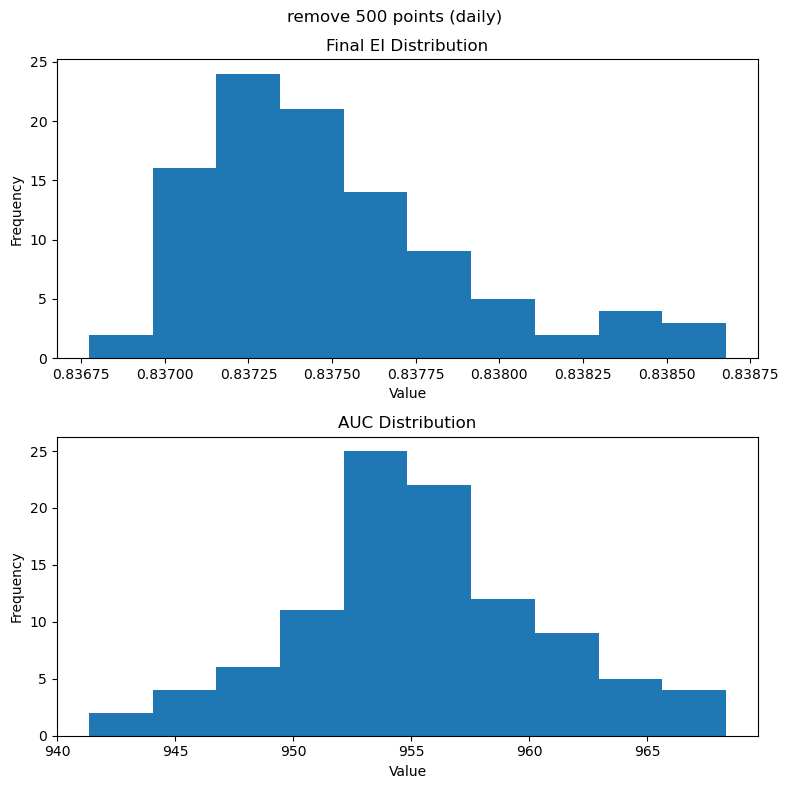

In [181]:
finalEIs, AUCs = sensitivity_analysis(temp, 500, 100)

fig, axes = plt.subplots(2, 1, figsize=(8, 8))

# ----- subplot 1: final EI -----
clean_EIs = [float(v.iloc[0]) if isinstance(v, pd.Series) else float(v) for v in finalEIs]
axes[0].hist(clean_EIs, bins=10)
axes[0].set_xlabel("Value")
axes[0].set_ylabel("Frequency")
axes[0].set_title("Final EI Distribution")

# ----- subplot 2: AUC -----
clean_AUCs = [float(v.iloc[0]) if isinstance(v, pd.Series) else float(v) for v in AUCs]
axes[1].hist(clean_AUCs, bins = 10)
axes[1].set_xlabel("Value")
axes[1].set_ylabel("Frequency")
axes[1].set_title("AUC Distribution")

plt.suptitle(f'remove 500 points (daily)')
plt.tight_layout()
plt.show()